Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

Isotopic Abundances
===================



In [4]:
import ENDF6el as el
import flux_recoil_spec as frs
import time
import importlib

#get Er vector
Er= np.geomspace(100/1e6, 1.0, 100)
print(np.shape(Er))
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)
start = time.time()
drde,dsig=frs.dRdErfast(Er,E,F,N=1)
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

(100,)
fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009998654133395216 0.01
Evaluation Time: 318.89064 sec.


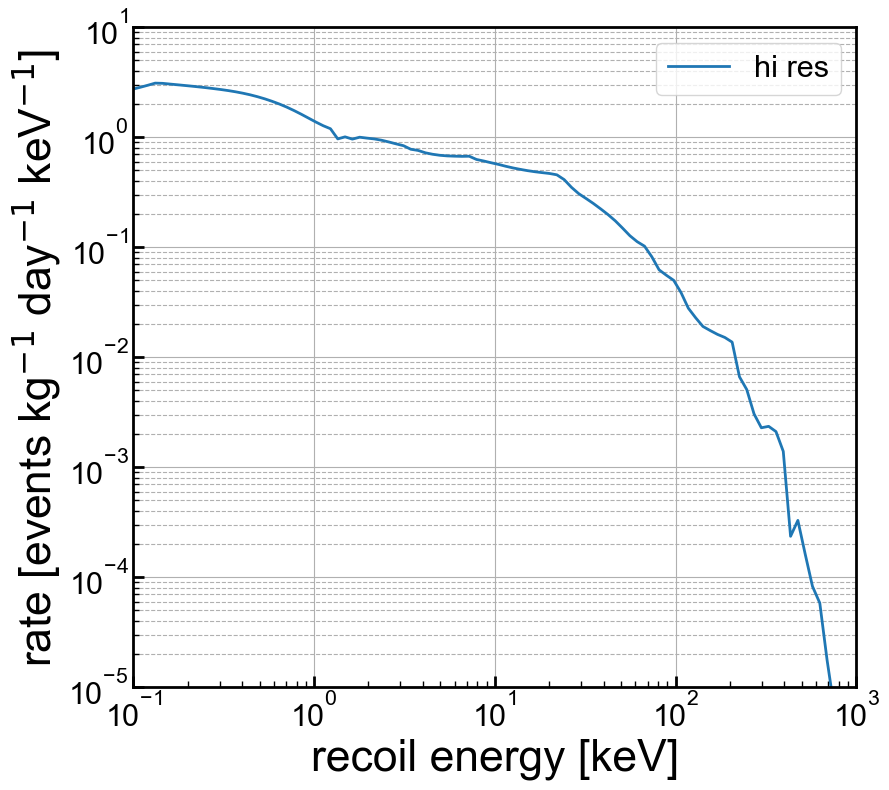

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er*1000, drde,label="hi res")



ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('../1-Paper_Figures/heflux.pdf')
#plt.savefig('../1-Paper_Figures/hist.pdf')
#plt.savefig('figures/first_recspec_library.png')
plt.show()